<a href="https://colab.research.google.com/github/seiji0906/machine/blob/main/L%3D30_0202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 値設定
L = 30
maxbeta = 0.5
minbeta = 0.38
folder_name = '相転移L={}'.format(L)
epoch = 10
# batch_size = 32
batch_size = 64
# batch_sizeを64へ
split = 50
repet = 20

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from numpy.core.fromnumeric import ravel
# データの作成
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [6]:
def neighor_spin_sum(s, x, y):
    x_right=x+1
    x_left=x-1
    y_up=y+1
    y_down=y-1

    # 周期境界条件
    if x_right>=Nx:
        x_right-=Nx
    if x_left<0:
        x_left+=Nx
    if y_up>=Ny:
        y_up-=Ny
    if y_down<0:
        y_down+=Ny

    neighor_spin_sum=s[x_right][y]+s[x_left][y]+s[x][y_up]+s[x][y_down]
    return neighor_spin_sum

In [7]:
def calc_energy(s, h=0.01):
    energy = 0
    for x in range(Nx):
        for y in range(Ny):
            # dobule count
            energy += - neighor_spin_sum(s, x, y)/2
    energy += h*np.sum(s)
    return energy

In [8]:
def gibbs_sampling(s, beta=1.0, h=0.0):
    xs=list(range(Nx))
    random.shuffle(xs)
    ys=list(range(Ny))
    random.shuffle(ys)
    for x in xs:
        for y in ys:
            k=neighor_spin_sum(s, x, y)-h
            trans_prob = np.exp(beta*k) / (np.exp(beta*k)+np.exp(-beta*k))
            if np.random.random()<=trans_prob:
                s[x][y]=1
            else:
                s[x][y]=-1
    return s

In [9]:
# # 相転移データ作成
# import matplotlib.animation as animation
# from matplotlib import rc
# import cv2
# import glob as glob
# from keras.utils import np_utils
# from sklearn.model_selection import train_test_split


# folder = r"drive/MyDrive/Colab Notebooks/常磁性L={}".format(L)
# if os.path.exists(folder):
#   shutil.rmtree(folder)
# if not os.path.exists(folder):
#   os.mkdir(folder)

# path = '/content/drive/MyDrive/Colab Notebooks'

# Nx = L
# Ny = L
# steps=100
# # 初期配位

# betas=np.linspace(0.1, 0.38, split).tolist()
# betas+=np.linspace(0.11, 0.381, split).tolist()

# for beta in betas:

#   fig, ax = plt.subplots(figsize=(6,6))
#   ax.axis("off")

#   s = np.random.randint(0, 2, (Nx, Ny)).tolist()

#   for i in range(repet):

#     for step in range(steps):
#       s = gibbs_sampling(s, beta=beta, h=0)

#       if step>=99:
#         im = ax.imshow(s, animated=True)

#         fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
#         filename = '/content/drive/MyDrive/Colab Notebooks/常磁性L={}/beta={}_step={}.jpg'.format(L, beta, i)

#         plt.savefig(filename)
#         # print(filename)
      
#   plt.close()

In [10]:
# # 相転移データ作成
# import matplotlib.animation as animation
# from matplotlib import rc
# import cv2
# import glob as glob
# from keras.utils import np_utils
# from sklearn.model_selection import train_test_split

# folder = r"drive/MyDrive/Colab Notebooks/強磁性L={}".format(L)
# if os.path.exists(folder):
#   shutil.rmtree(folder)
# if not os.path.exists(folder):
#   os.mkdir(folder)

# path = '/content/drive/MyDrive/Colab Notebooks'

# Nx = L
# Ny = L
# steps=100
# # 初期配位

# betas=np.linspace(0.5, 1.0, split).tolist()
# betas+=np.linspace(0.51, 1.01, split).tolist()

# for beta in betas:

#   fig, ax = plt.subplots(figsize=(6,6))
#   ax.axis("off")

#   s = np.random.randint(0, 2, (Nx, Ny)).tolist()

#   for i in range(repet):

#     for step in range(steps):
#       s = gibbs_sampling(s, beta=beta, h=0)

#       if step>=99:
#         im = ax.imshow(s, animated=True)

#         fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
#         filename = '/content/drive/MyDrive/Colab Notebooks/強磁性L={}/beta={}_step={}.jpg'.format(L, beta, i)

#         plt.savefig(filename)
#         # print(filename)
      
#   plt.close()

In [11]:
import numpy as np
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/Colab Notebooks'


filename1 = '常磁性L={}'.format(L)
filename2 = '強磁性L={}'.format(L)

folder = [filename1, filename2]

X_image = []
Y_label = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)
    Y_label.append(label)

X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

Y_label = np.array(Y_label)
Y_label = np_utils.to_categorical(Y_label, len(folder))
Y_label[:5]



X_train,X_test,Y_train,Y_test = train_test_split(X_image,Y_label,test_size=0.2, shuffle=True)

print(len(X_train))
print(len(X_test))

3200
800


In [12]:
from tensorflow.python import metrics
from warnings import filters
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 1))

leaky_relu = keras.layers.LeakyReLU(alpha=0.2)

# adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(2, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 1)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [13]:
# 学習データで学習
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch_size)

#テストデータで精度確認
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

Epoch 1/10
50/50 [==============================] - 200s 4s/step - loss: 0.6960 - accuracy: 0.5113
Epoch 2/10
50/50 [==============================] - 200s 4s/step - loss: 0.7061 - accuracy: 0.5284
Epoch 3/10
50/50 [==============================] - 199s 4s/step - loss: 0.6789 - accuracy: 0.6103
Epoch 4/10
50/50 [==============================] - 196s 4s/step - loss: 0.4541 - accuracy: 0.8178
Epoch 5/10
50/50 [==============================] - 196s 4s/step - loss: 0.3220 - accuracy: 0.9069
Epoch 6/10
50/50 [==============================] - 195s 4s/step - loss: 0.0429 - accuracy: 0.9872
Epoch 7/10
50/50 [==============================] - 197s 4s/step - loss: 0.4450 - accuracy: 0.9766
Epoch 8/10
50/50 [==============================] - 196s 4s/step - loss: 0.0056 - accuracy: 1.0000
Epoch 9/10
50/50 [==============================] - 195s 4s/step - loss: 0.1917 - accuracy: 0.9669
Epoch 10/10
13/13 [==============================] - 14s 1s/step - loss: 3.9192e-04 - accuracy: 1.0000


In [34]:
# 相転移データ作成
import matplotlib.animation as animation
from matplotlib import rc
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

folder = r"drive/MyDrive/Colab Notebooks/相転移L={}".format(L)
if os.path.exists(folder):
  shutil.rmtree(folder)
if not os.path.exists(folder):
  os.mkdir(folder)

path = '/content/drive/MyDrive/Colab Notebooks'

Nx = L
Ny = L
steps=100
# 初期配位

betas=np.linspace(minbeta, maxbeta, split).tolist()

for beta in betas:

  fig, ax = plt.subplots(figsize=(6,6))
  ax.axis("off")

  s = np.random.randint(0, 2, (Nx, Ny)).tolist()

  for i in range(repet):

    for step in range(steps):
      s = gibbs_sampling(s, beta=beta, h=0)

      if step>=99:
        im = ax.imshow(s, animated=True)

        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
        filename = '/content/drive/MyDrive/Colab Notebooks/相転移L={}/beta={}_step={}.jpg'.format(L, beta, i)

        plt.savefig(filename)
        # print(filename)
      
  plt.close()

In [35]:
path = '/content/drive/MyDrive/Colab Notebooks'


folder = [folder_name]

X_image = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)

X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

print(len(X_image))

1000


In [36]:
history = model.predict(X_image)

32/32 [==============================] - 17s 545ms/step


0.441004296760224
30
50
[ 0.44033295 98.83106131]


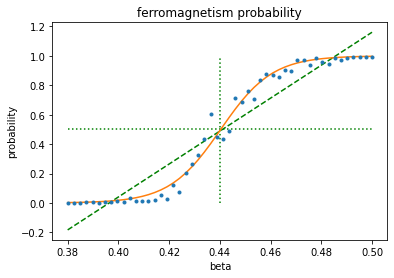

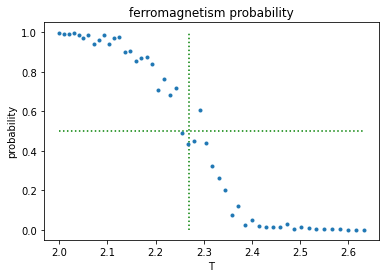

In [37]:
import matplotlib.pyplot as plt
from statistics import mean

# plt.plot(history)

predict = []

for i in range(len(history)):
  predict.append(history[i][1])


result = []

p = 0

for i in range(split):
  for j in range(repet):
    p += predict[i*repet+j]
  result.append(p / repet)
  p = 0

# split=20
# for i in range(split):
#   for j in range(10):
#     p += predict[i*10+j]
#   result.append(p / 10)
#   p = 0

betas=np.linspace(minbeta, maxbeta, split).tolist()
T = list(map(lambda x: 1/x, betas))


A = np.array([betas, np.ones(len(betas))])
A = A.T
a,b = np.linalg.lstsq(A,result,rcond=None)[0]

y = []

# print(a)
# print(b)


for i in range(len(betas)):
  y.append(a * betas[i] + b)


print((0.5-b)/a)

# 0.5 = a * x + b
# x = (0.5 - b)/a
# まずはbetaの値でやってみて、0.44かどうかをみる

# tc = 0.447

# beta-probability
fig, ax = plt.subplots()
plt.title("ferromagnetism probability")
plt.xlabel('beta')
plt.ylabel('probability')
plt.hlines(0.5, minbeta, maxbeta, color='g', linestyles='dotted')
plt.vlines(0.44, 0, 1, color='g', linestyles='dotted')
# plt.vlines(tc, 0, 1, color='g', linestyles='dotted')
ax.errorbar(betas, result, capsize=4, marker='.', linestyle="")
plt.plot(betas, y, "g--")

from scipy.optimize import curve_fit
def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

print(L)
print(len(result))

x0_initial = 10.2
k_initial = 0.2
popt, pcov = curve_fit(sigmoid, betas, result, [x0_initial,k_initial])
# xs_fit = np.linspace(0, 50, 50)
xs_fit = betas
print(popt)
ys_fit = sigmoid(xs_fit, *popt)
plt.plot(xs_fit,ys_fit)
plt.show()

# T-probability
fig, ax = plt.subplots()
plt.title("ferromagnetism probability")
plt.xlabel('T')
plt.ylabel('probability')
plt.hlines(0.5, 1/maxbeta, 1/minbeta, color='g', linestyles='dotted')
plt.vlines(2.27, 0, 1, color='g', linestyles='dotted')
# plt.vlines(1/tc, 0, 1, color='g', linestyles='dotted')
ax.errorbar(T, result, capsize=4, marker='.', linestyle="")
plt.show()